In [1]:
# Lung Cancer Detection Project

## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [16]:
# Load dataset
data = pd.read_csv('surveylungcancer.csv')

In [17]:
## Data Overview and Initial Exploration
print("Data Overview")
print(data.head())

print("\nData Info")
print(data.info())

print("\nData Description")
print(data.describe())

Data Overview
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2        

In [5]:
## Data Preprocessing

# Encoding target variable
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Splitting features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature engineering: Identify numerical and categorical features
numeric_features = ['AGE']
categorical_features = ['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ' ,'ALLERGY ' ,'WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [32]:
## Model Training and Evaluation

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



Logistic Regression
Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1-Score: 0.9833333333333333
AUC-ROC: 0.7416666666666667
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


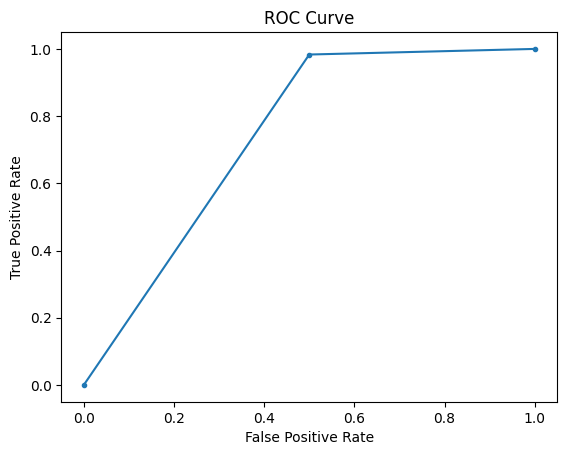

In [33]:
### Logistic Regression
print("\nLogistic Regression")
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])
logreg_pipeline.fit(X_train, y_train)
evaluate_model(logreg_pipeline, X_test, y_test)


Random Forest Classifier
Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1-Score: 0.9833333333333333
AUC-ROC: 0.7416666666666667
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


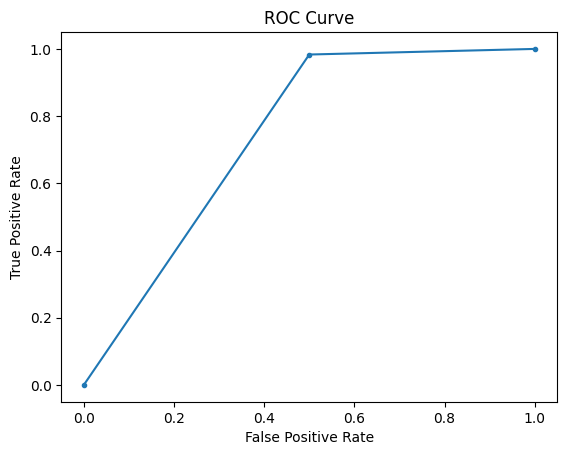

In [34]:
### Random Forest Classifier
print("\nRandom Forest Classifier")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
evaluate_model(rf_pipeline, X_test, y_test)


Support Vector Machine
Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1-Score: 0.9833333333333333
AUC-ROC: 0.7416666666666667
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


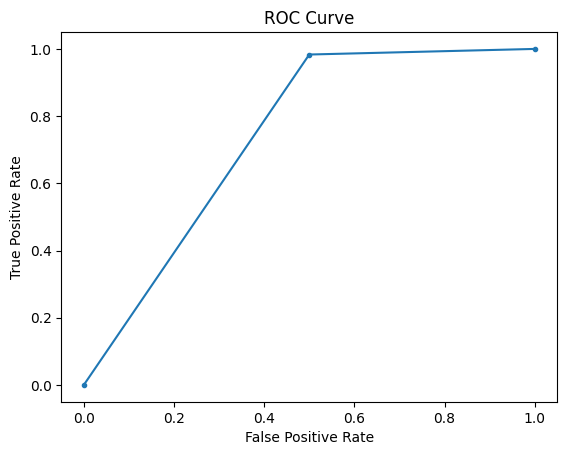

In [35]:
### Support Vector Machine
print("\nSupport Vector Machine")
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(probability=True))])
svm_pipeline.fit(X_train, y_train)
evaluate_model(svm_pipeline, X_test, y_test)


k-Nearest Neighbors
Accuracy: 0.9354838709677419
Precision: 0.9827586206896551
Recall: 0.95
F1-Score: 0.9661016949152542
AUC-ROC: 0.725
Confusion Matrix:
 [[ 1  1]
 [ 3 57]]


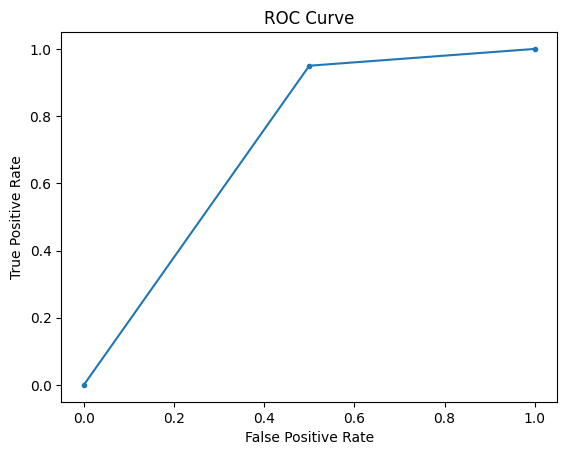

In [36]:
### k-Nearest Neighbors
print("\nk-Nearest Neighbors")
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])
knn_pipeline.fit(X_train, y_train)
evaluate_model(knn_pipeline, X_test, y_test)


Neural Network


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9516129032258065
Precision: 0.9830508474576272
Recall: 0.9666666666666667
F1-Score: 0.9747899159663865
AUC-ROC: 0.7333333333333334
Confusion Matrix:
 [[ 1  1]
 [ 2 58]]


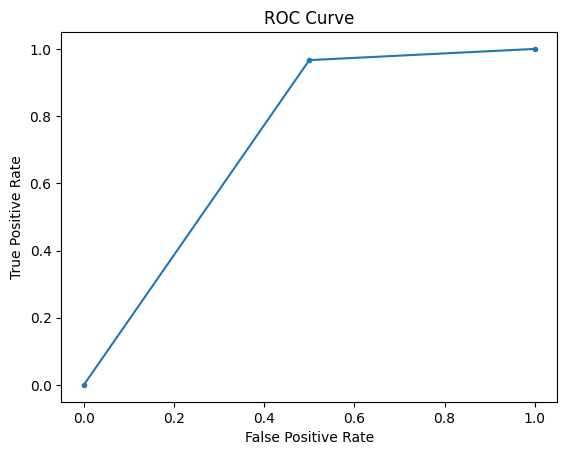

In [37]:
### Neural Network
print("\nNeural Network")
nn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(random_state=42))])
nn_pipeline.fit(X_train, y_train)
evaluate_model(nn_pipeline, X_test, y_test)

In [38]:
## Comparison of All Models
models = {
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline,
    "Support Vector Machine": svm_pipeline,
    "k-Nearest Neighbors": knn_pipeline,
    "Neural Network": nn_pipeline
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print("\nComparison of All Models")
print(results_df)

## Conclusion
print("\nConclusion")
best_model = results_df.idxmax()['F1-Score']
print(f"The best model based on F1-Score is: {best_model}")


Comparison of All Models
                        Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression     0.967742   0.983333  0.983333  0.983333  0.741667
Random Forest           0.967742   0.983333  0.983333  0.983333  0.741667
Support Vector Machine  0.967742   0.983333  0.983333  0.983333  0.741667
k-Nearest Neighbors     0.935484   0.982759  0.950000  0.966102  0.725000
Neural Network          0.951613   0.983051  0.966667  0.974790  0.733333

Conclusion
The best model based on F1-Score is: Logistic Regression
